https://www.salesanalytics.co.jp/datascience/datascience114/

Autocorrelation and cross-correlation
# 自己相関と相互相関

過去の自分との類似性を見るのが「自己相関」、他の時系列データとの類似性を見るのが「相互相関」です。
# Autocorrelation means to compare the current data with a past version of itself, while cross-correlation means to compare with other datasets.

In [1]:
import pandas as pd
import numpy as np

from scipy import signal
from scipy import stats

from matplotlib import mlab
import matplotlib.pyplot as plt

plt.style.use('ggplot') #グラフのスタイル
plt.rcParams['figure.figsize'] = [12, 9] # グラフサイズ設定


In [2]:
#/Users/sahiyo/PycharmProjects/Data/AirPassengersDates.csv

# データセットの読み込み
url='https://www.salesanalytics.co.jp/591h' #データセットのあるURL
df=pd.read_csv(url,                         #読み込むデータのURL
               dtype = {'Passengers':'float'},
               index_col='Month',           #変数「Month」をインデックスに設定
               parse_dates=True)           #インデックスを日付型に設定
df.head() #確認


,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

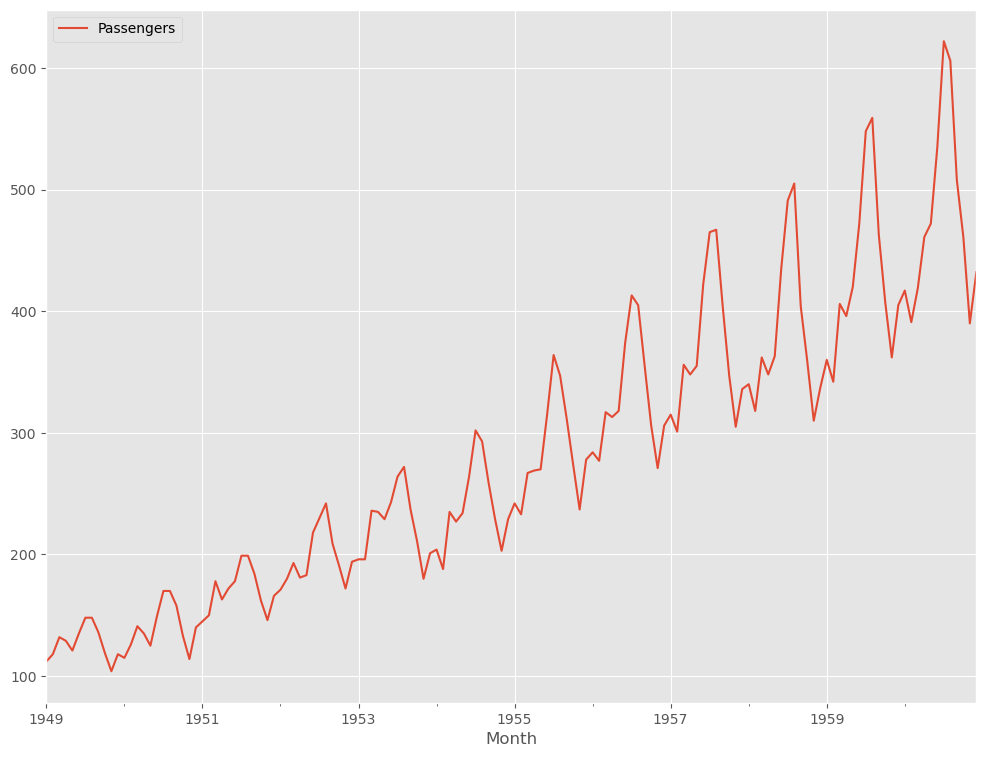

In [3]:
df.plot()

In [7]:
df_std = stats.zscore(df)
df_std

,Passengers
Month,
1949-01-01,-1.407779
1949-02-01,-1.357590
1949-03-01,-1.240483
1949-04-01,-1.265578
1949-05-01,-1.332496
...,...
1960-08-01,2.724417
1960-09-01,1.904669
1960-10-01,1.511525


<function matplotlib.pyplot.show(close=None, block=None)>

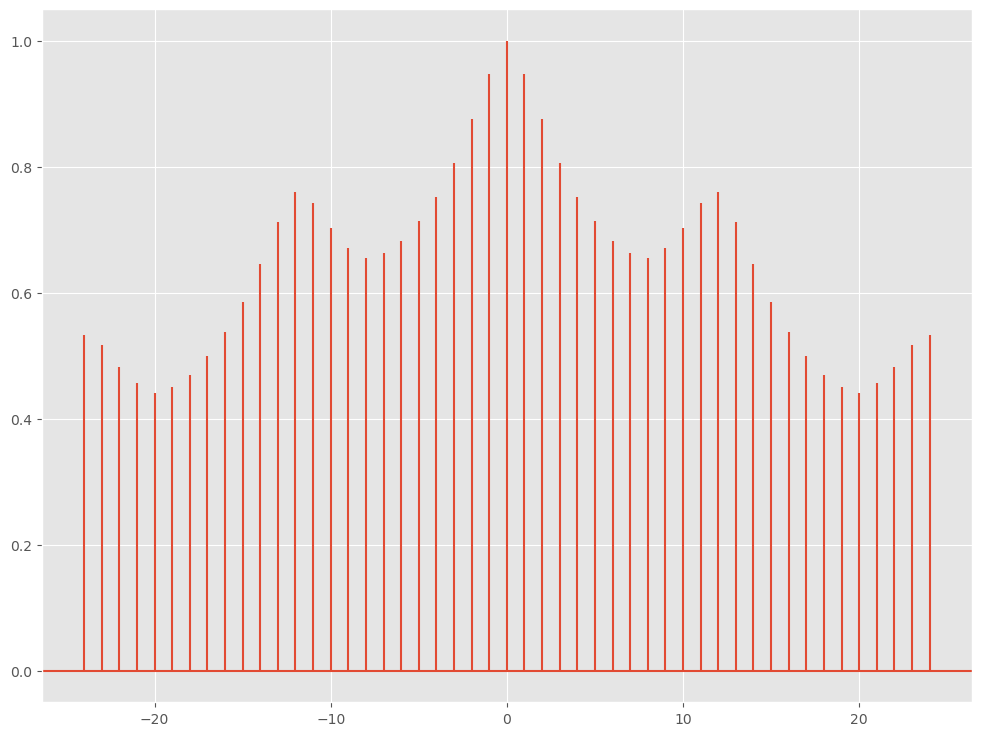

In [15]:
# what is the correlogram indicating the trending in serial data.
# 自己相関コレログラム（原系列）
acor_value = plt.acorr(df_std['Passengers'], 
                       detrend=mlab.detrend_none, 
                       maxlags=24)
plt.show

In [14]:
type(acor_value)

tuple

In [9]:
acor_pd = pd.DataFrame(acor_value[1],acor_value[0])
acor_pd.index.name = 'lag'
acor_pd.columns = ['acor']
acor_pd #確認

,acor
lag,
-30,0.288497
-29,0.314984
-28,0.348025
-27,0.387603
-26,0.437721
...,...
26,0.437721
27,0.387603
28,0.348025


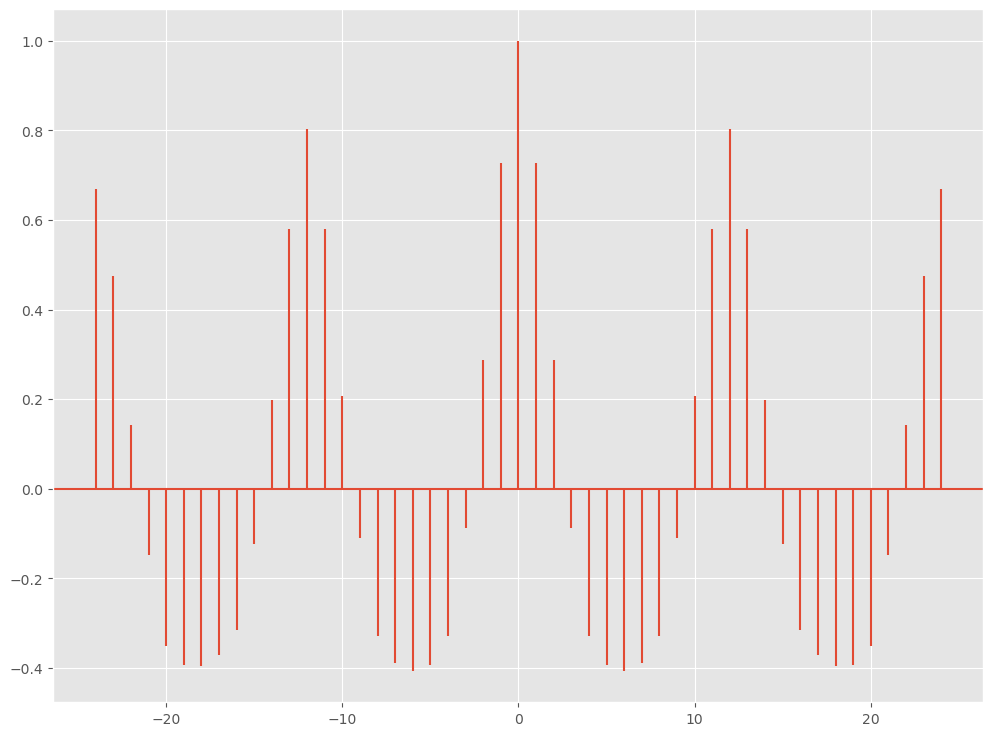

In [16]:
acor_value = plt.acorr(df_std['Passengers'], 
                       detrend=mlab.detrend_linear, 
                       maxlags=24)
plt.show()

<AxesSubplot:xlabel='day'>

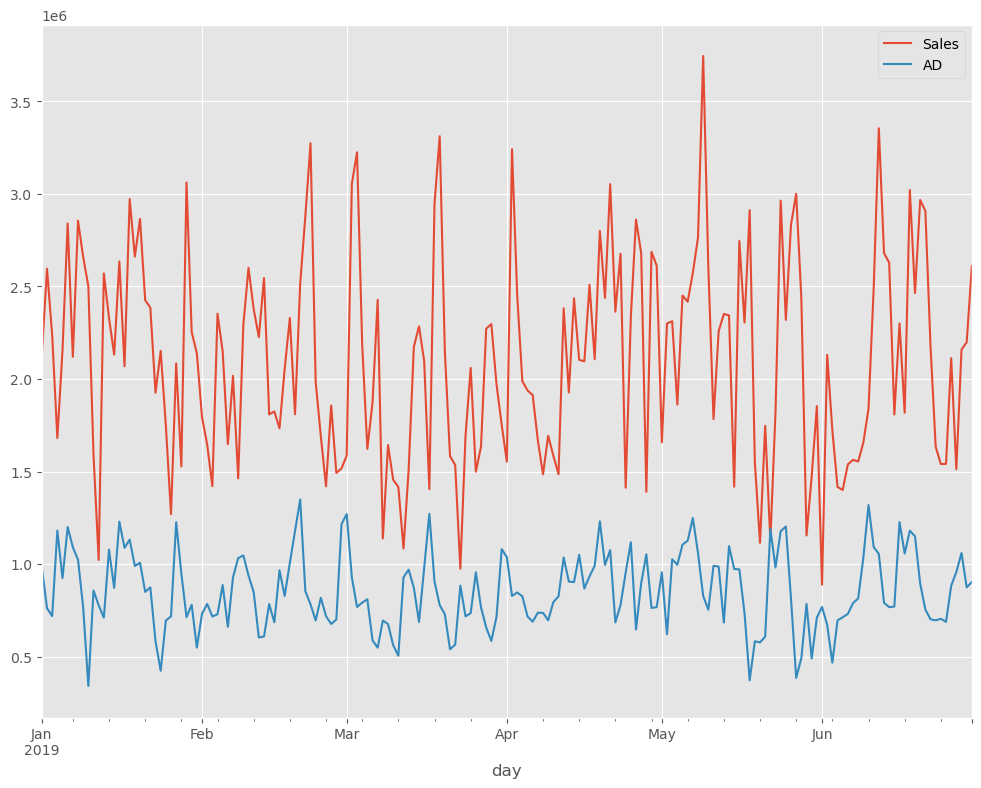

In [17]:
url = 'https://www.salesanalytics.co.jp/glrg'
df = pd.read_csv(url,
                 parse_dates=True,
                 index_col='day'
                )
# グラフ化
df.plot()

In [18]:
# ADラグ＋Salesのデータセットの生成
df_AD = pd.concat([df['AD'],
                   df['AD'].shift(1),
                   df['AD'].shift(2),
                   df['AD'].shift(3),
                   df['AD'].shift(4),
                   df['AD'].shift(5),
                  ],
                  axis=1)
df_AD.columns = ['AD_lag0',
                 'AD_lag1',
                 'AD_lag2',
                 'AD_lag3',
                 'AD_lag4',
                 'AD_lag5'
                ]
df_AD['Sales']=df['Sales']
df_AD #確認


,AD_lag0,AD_lag1,AD_lag2,AD_lag3,AD_lag4,AD_lag5,Sales
day,,,,,,,
2019-01-01,9.828000e+05,NaN,NaN,NaN,NaN,NaN,2132000
2019-01-02,7.609000e+05,9.828000e+05,NaN,NaN,NaN,NaN,2596100
2019-01-03,7.184667e+05,7.609000e+05,9.828000e+05,NaN,NaN,NaN,2236200
2019-01-04,1.180933e+06,7.184667e+05,7.609000e+05,982800.0000,NaN,NaN,1680900
2019-01-05,9.238000e+05,1.180933e+06,7.184667e+05,760900.0000,982800.0000,NaN,2155400
...,...,...,...,...,...,...,...
2019-06-26,8.820667e+05,6.870000e+05,7.041333e+05,695600.0000,701166.6667,754266.6667,2112400
2019-06-27,9.572333e+05,8.820667e+05,6.870000e+05,704133.3333,695600.0000,701166.6667,1512300
2019-06-28,1.059400e+06,9.572333e+05,8.820667e+05,687000.0000,704133.3333,695600.0000,2158700


In [19]:
df_AD.corr()['Sales']

AD_lag0    0.124325
AD_lag1    0.471159
AD_lag2    0.901898
AD_lag3    0.369923
AD_lag4    0.197210
AD_lag5    0.022170
Sales      1.000000
Name: Sales, dtype: float64

In [29]:
df_std = stats.zscore(df)
df_std.head()

,Sales,AD
day,,
2019-01-01,0.039626,0.633305
2019-01-02,0.874003,-0.448826
2019-01-03,0.226961,-0.655759
2019-01-04,-0.771379,1.599533
2019-01-05,0.081695,0.345582


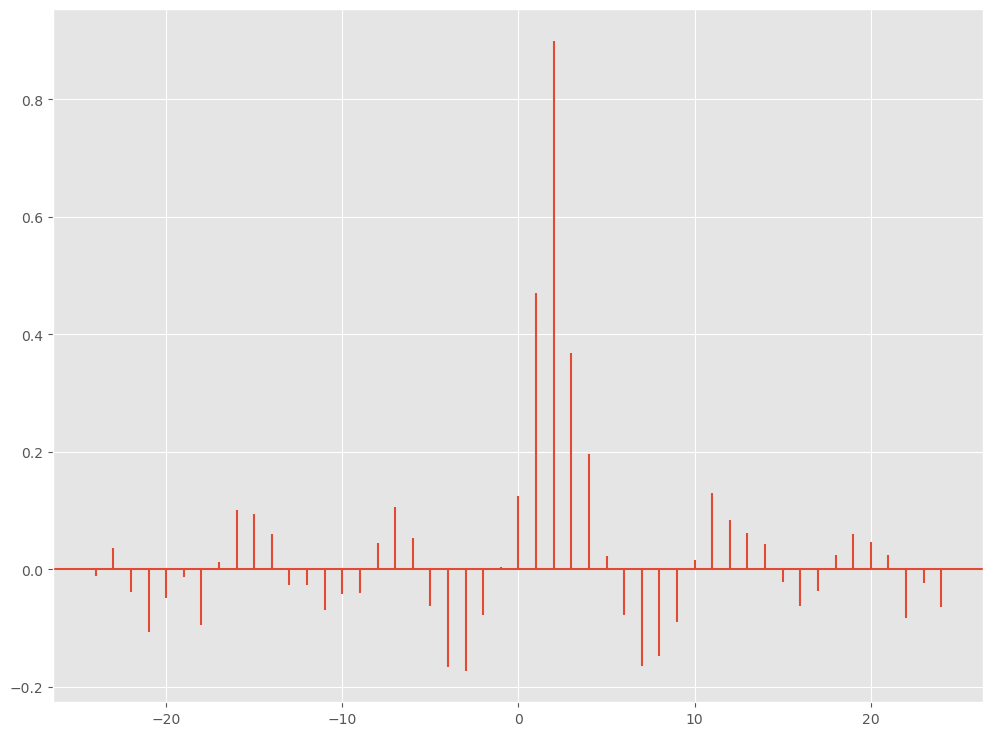

In [30]:
xcor_value = plt.xcorr(df_std['Sales'], 
                       df_std['AD'],
                       detrend=mlab.detrend_none, 
                       maxlags=24)
plt.show()

In [31]:
xcor_pd = pd.DataFrame(xcor_value[1],xcor_value[0])
xcor_pd.index.name = 'lag'
xcor_pd.columns = ['xcor']
xcor_pd #確認


,xcor
lag,
-24,-0.011631
-23,0.036692
-22,-0.038198
-21,-0.106948
-20,-0.048733
-19,-0.012834
-18,-0.095036
-17,0.011902
-16,0.100478


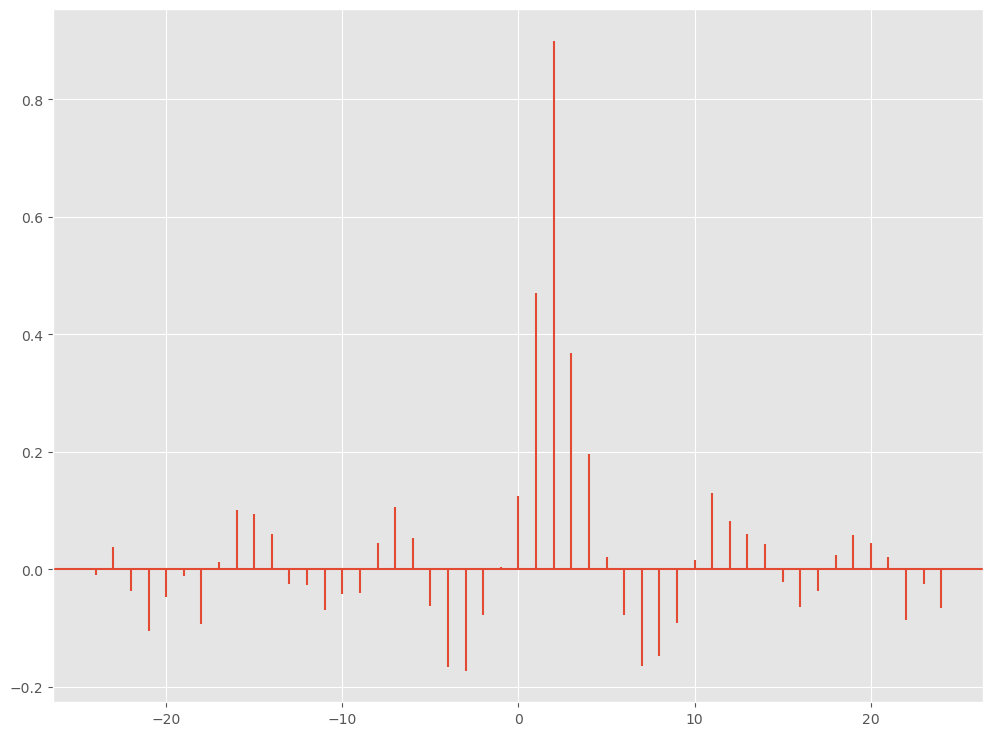

In [32]:
xcor_value = plt.xcorr(df_std['Sales'], 
                       df_std['AD'],
                       detrend=mlab.detrend_linear, 
                       maxlags=24)
plt.show()
